# **PROBLEM STATEMENT** 


### **BUSINESS PROBLEM**

HID Solutions one of the leading RFID technology for automotive applications, is commited to leveraging advanced data analystics to enhance vehicle recognition and tracking. The current challenge is to implement my skills as a data analyst to identify and locate the buses within fleet. This dataset consist of some data like acceleration, angular velocity, magnetic field and orientation parameters. The goal is to develop a model that can predict the specified bus and its location based on these sensor readings.

The dataset I have used is from the kaggle the link is attached below 

https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml?select=business_data.csv
In this dataset I tried different models like Multilayer perceptron (MLP), Deep Neural Network (DNN) and Recurrent Neural Network (RNN). From these the best perfomance was by MLP the Test loss was 0.000423830293584615. For DNN test loss was 3.6485 and for RNN test loss was 1.8253. So considering the test loss best model for this dataset is Multilayer Perceptron (MLP).

# **IMPORTING LIBRARIES AND PACKAGES**

In [699]:
import numpy as np # numerical operation and array manipulations.
import pandas as pd # data manipulation and analysis of dataframe objects 
import seaborn as sns # for visualization 
import tensorflow as tf #core library for deep learning model
from tensorflow.keras.optimizers import Adam # for training neural network models
from tensorflow.keras.models import Sequential # linear stack layers
from sklearn.preprocessing import StandardScaler #for scaling and normalizing data 
from sklearn.model_selection import train_test_split #for splitting datasets into test and 
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU #layers for building various types of neural network 
from sklearn.metrics import accuracy_score, classification_report #metrics for evaluating the perfomance of models 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # callback for stopping training early and saving the best model 

# **DATA COLLECTION AND CLEANING**

In [660]:
df = pd.read_csv(r'C:\Users\USER\Downloads\bus.csv') #inserting the dataset to the pipeline 
df

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,...,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s),Unnamed: 22
0,0.078756,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,32.6287,0.0000,0.0000,0.0000,-∞,0.0,0.0,0.0,NaN
1,0.123827,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,32.6287,0.0000,0.0000,0.0000,-∞,0.0,0.0,0.0,NaN
2,0.135678,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,32.6287,0.0000,0.0000,0.0000,-∞,0.0,0.0,0.0,NaN
3,0.142924,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0330,-0.3477,0.1489,...,0.0000,32.6287,0.0000,0.0000,0.0000,-∞,0.0,0.0,0.0,NaN
4,0.189734,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0330,-0.3477,0.1489,...,-4.9962,32.6287,0.0000,0.0000,0.0000,-∞,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,159.199108,0.0058,0.2962,0.9510,0.2871,0.1037,-0.1953,-0.1628,0.0084,0.0689,...,-0.5875,35.9750,198.1116,-17.7065,-0.5754,-3154.3962,0.0,0.0,0.0,NaN
2851,159.208239,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.1628,0.0084,0.0689,...,-0.5875,35.9750,198.1116,-17.7065,-0.5754,-3154.3962,0.0,0.0,0.0,NaN
2852,159.209070,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.1628,0.0084,0.0689,...,-0.5875,35.9750,197.9616,-17.6049,-0.1878,-3154.3962,0.0,0.0,0.0,NaN
2853,159.219120,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.0157,-0.1060,0.0312,...,-0.5875,35.9750,197.9616,-17.6049,-0.1878,-3154.3962,0.0,0.0,0.0,NaN


In [698]:
columns_to_remove = [ 'p', 'I','Gain', 'Unnamed: 22', 'Latitude', 'Longitude', 'Roll'] #removing unwanted columns 
df2=df.drop(columns=columns_to_remove) #new dataframe without the removed columns are defined as df2
df2

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,Azimuth,Pitch,Speed (m/s)
0,0.078756,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0
1,0.123827,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0
2,0.135678,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0
3,0.142924,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0330,-0.3477,0.1489,0.0000,0.000,0.0000,0.0000,0.0000,0.0
4,0.189734,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0330,-0.3477,0.1489,24.3250,-23.765,-4.9962,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,159.199108,0.0058,0.2962,0.9510,0.2871,0.1037,-0.1953,-0.1628,0.0084,0.0689,7.5250,-26.915,-0.5875,198.1116,-17.7065,0.0
2851,159.208239,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.1628,0.0084,0.0689,7.5250,-26.915,-0.5875,198.1116,-17.7065,0.0
2852,159.209070,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.1628,0.0084,0.0689,7.5250,-26.915,-0.5875,197.9616,-17.6049,0.0
2853,159.219120,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.0157,-0.1060,0.0312,7.5250,-26.915,-0.5875,197.9616,-17.6049,0.0


In [700]:
columns_to_remove = [ 'Speed (m/s)'] #for the later process a third dataframe is required excluding the speed (m/s) column
df3=df2.drop(columns=columns_to_remove) # df3 is defined 
df3

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,Azimuth,Pitch
0,0.078756,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
1,0.123827,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
2,0.135678,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
3,0.142924,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0330,-0.3477,0.1489,0.0000,0.000,0.0000,0.0000,0.0000
4,0.189734,-0.0488,0.3217,1.0039,0.0000,0.0000,0.0000,0.0330,-0.3477,0.1489,24.3250,-23.765,-4.9962,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,159.199108,0.0058,0.2962,0.9510,0.2871,0.1037,-0.1953,-0.1628,0.0084,0.0689,7.5250,-26.915,-0.5875,198.1116,-17.7065
2851,159.208239,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.1628,0.0084,0.0689,7.5250,-26.915,-0.5875,198.1116,-17.7065
2852,159.209070,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.1628,0.0084,0.0689,7.5250,-26.915,-0.5875,197.9616,-17.6049
2853,159.219120,0.0058,0.2962,0.9510,0.1001,-0.0277,0.1021,-0.0157,-0.1060,0.0312,7.5250,-26.915,-0.5875,197.9616,-17.6049


# **DATA PREPROCESSING**

In [663]:
df2.isnull().sum()

time           0
gFx            0
gFy            0
gFz            0
ax             0
ay             0
az             0
wx             0
wy             0
wz             0
Bx             0
By             0
Bz             0
Azimuth        0
Pitch          0
Speed (m/s)    0
dtype: int64

In [664]:
df2.info

<bound method DataFrame.info of             time     gFx     gFy     gFz      ax      ay      az      wx  \
0       0.078756  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1       0.123827 -0.0488  0.3217  1.0039  0.0000  0.0000  0.0000  0.0000   
2       0.135678 -0.0488  0.3217  1.0039  0.0000  0.0000  0.0000  0.0000   
3       0.142924 -0.0488  0.3217  1.0039  0.0000  0.0000  0.0000  0.0330   
4       0.189734 -0.0488  0.3217  1.0039  0.0000  0.0000  0.0000  0.0330   
...          ...     ...     ...     ...     ...     ...     ...     ...   
2850  159.199108  0.0058  0.2962  0.9510  0.2871  0.1037 -0.1953 -0.1628   
2851  159.208239  0.0058  0.2962  0.9510  0.1001 -0.0277  0.1021 -0.1628   
2852  159.209070  0.0058  0.2962  0.9510  0.1001 -0.0277  0.1021 -0.1628   
2853  159.219120  0.0058  0.2962  0.9510  0.1001 -0.0277  0.1021 -0.0157   
2854  159.219891  0.0058  0.2962  0.9510  0.1001 -0.0277  0.1021 -0.0157   

          wy      wz       Bx      By      Bz   Azimuth

In [665]:
df2.describe()

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,Azimuth,Pitch,Speed (m/s)
count,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.00000,2855.000000,2855.0
mean,18.076961,0.087558,0.400748,0.911205,0.504671,-0.232457,0.090487,0.002274,-0.005935,-0.006751,25.177246,-24.752091,-4.021920,231.03857,-25.080174,0.0
std,20.091625,0.075488,0.070508,0.092121,0.515457,0.499653,0.840846,0.100842,0.134451,0.089560,4.505332,2.333398,2.295722,26.24970,3.413687,0.0
min,0.078756,-0.192000,0.000000,0.000000,-0.856600,-1.870100,-3.053000,-0.500000,-0.599700,-0.407900,0.000000,-29.460000,-13.772500,0.00000,-29.361400,0.0
25%,8.138358,0.062500,0.355300,0.871300,0.149100,-0.540900,-0.265500,-0.025700,-0.036500,-0.032900,22.428700,-25.977500,-5.086200,224.10630,-27.153600,0.0
50%,16.053784,0.083400,0.420000,0.895500,0.354800,-0.224000,-0.053800,0.000300,-0.003700,-0.005000,27.373700,-24.298700,-4.397500,239.96360,-25.879500,0.0
75%,23.984960,0.127600,0.456000,0.955100,0.723000,0.206200,0.447100,0.025800,0.016500,0.005200,27.950000,-24.003700,-3.242500,241.44780,-24.203600,0.0
max,159.219891,0.275900,0.564000,1.499700,2.156400,1.286300,5.864800,0.764200,0.882200,0.539200,33.510000,0.000000,2.736200,245.24570,0.000000,0.0


In [666]:
df2.dtypes

time           float64
gFx            float64
gFy            float64
gFz            float64
ax             float64
ay             float64
az             float64
wx             float64
wy             float64
wz             float64
Bx             float64
By             float64
Bz             float64
Azimuth        float64
Pitch          float64
Speed (m/s)    float64
dtype: object

# **DATA VISUALIZATION**
For overall visualization of the dataset. To get an idea of the variables.  Here i have used histogram, scatterplot, correlation heatmap for a general visualization of the dataset.

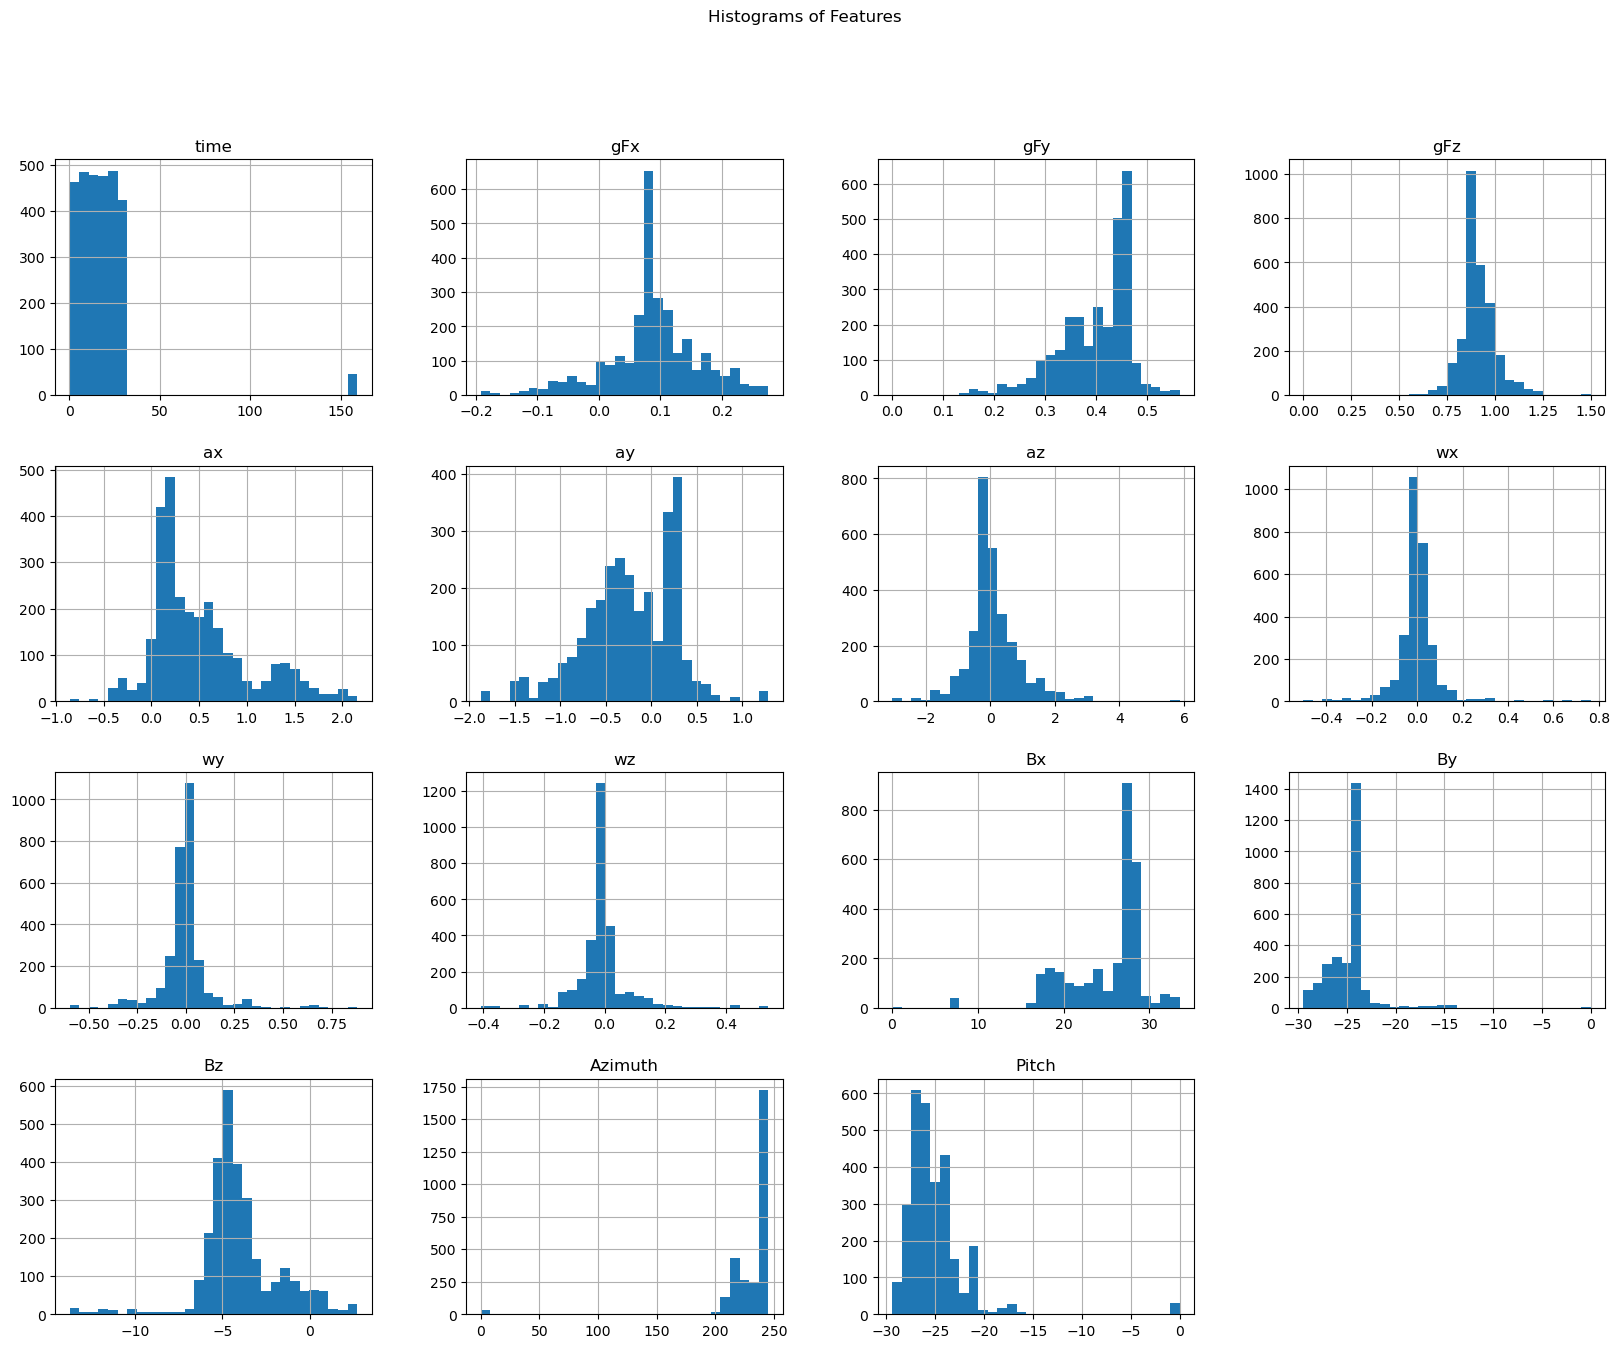

In [667]:
df3.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Features')
plt.show()

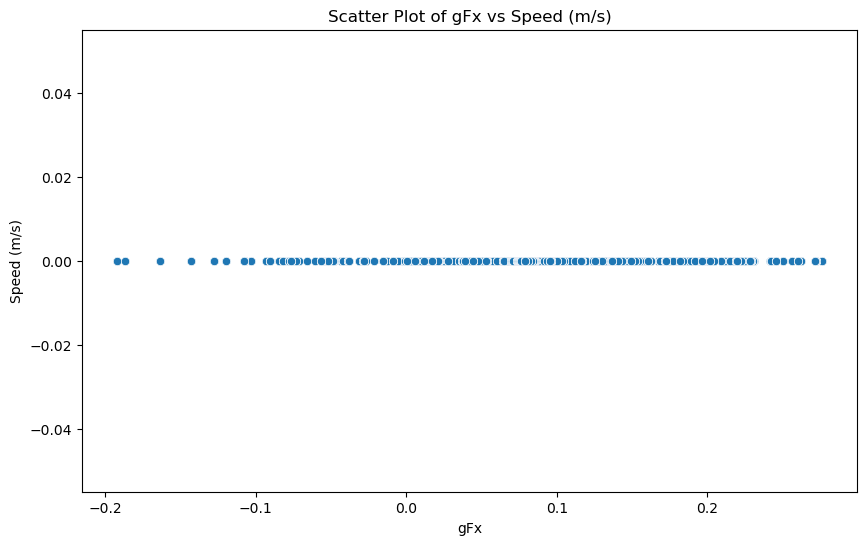

In [668]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['gFx'], y=df['Speed (m/s)'])
plt.title('Scatter Plot of gFx vs Speed (m/s)')
plt.xlabel('gFx')
plt.ylabel('Speed (m/s)')
plt.show()

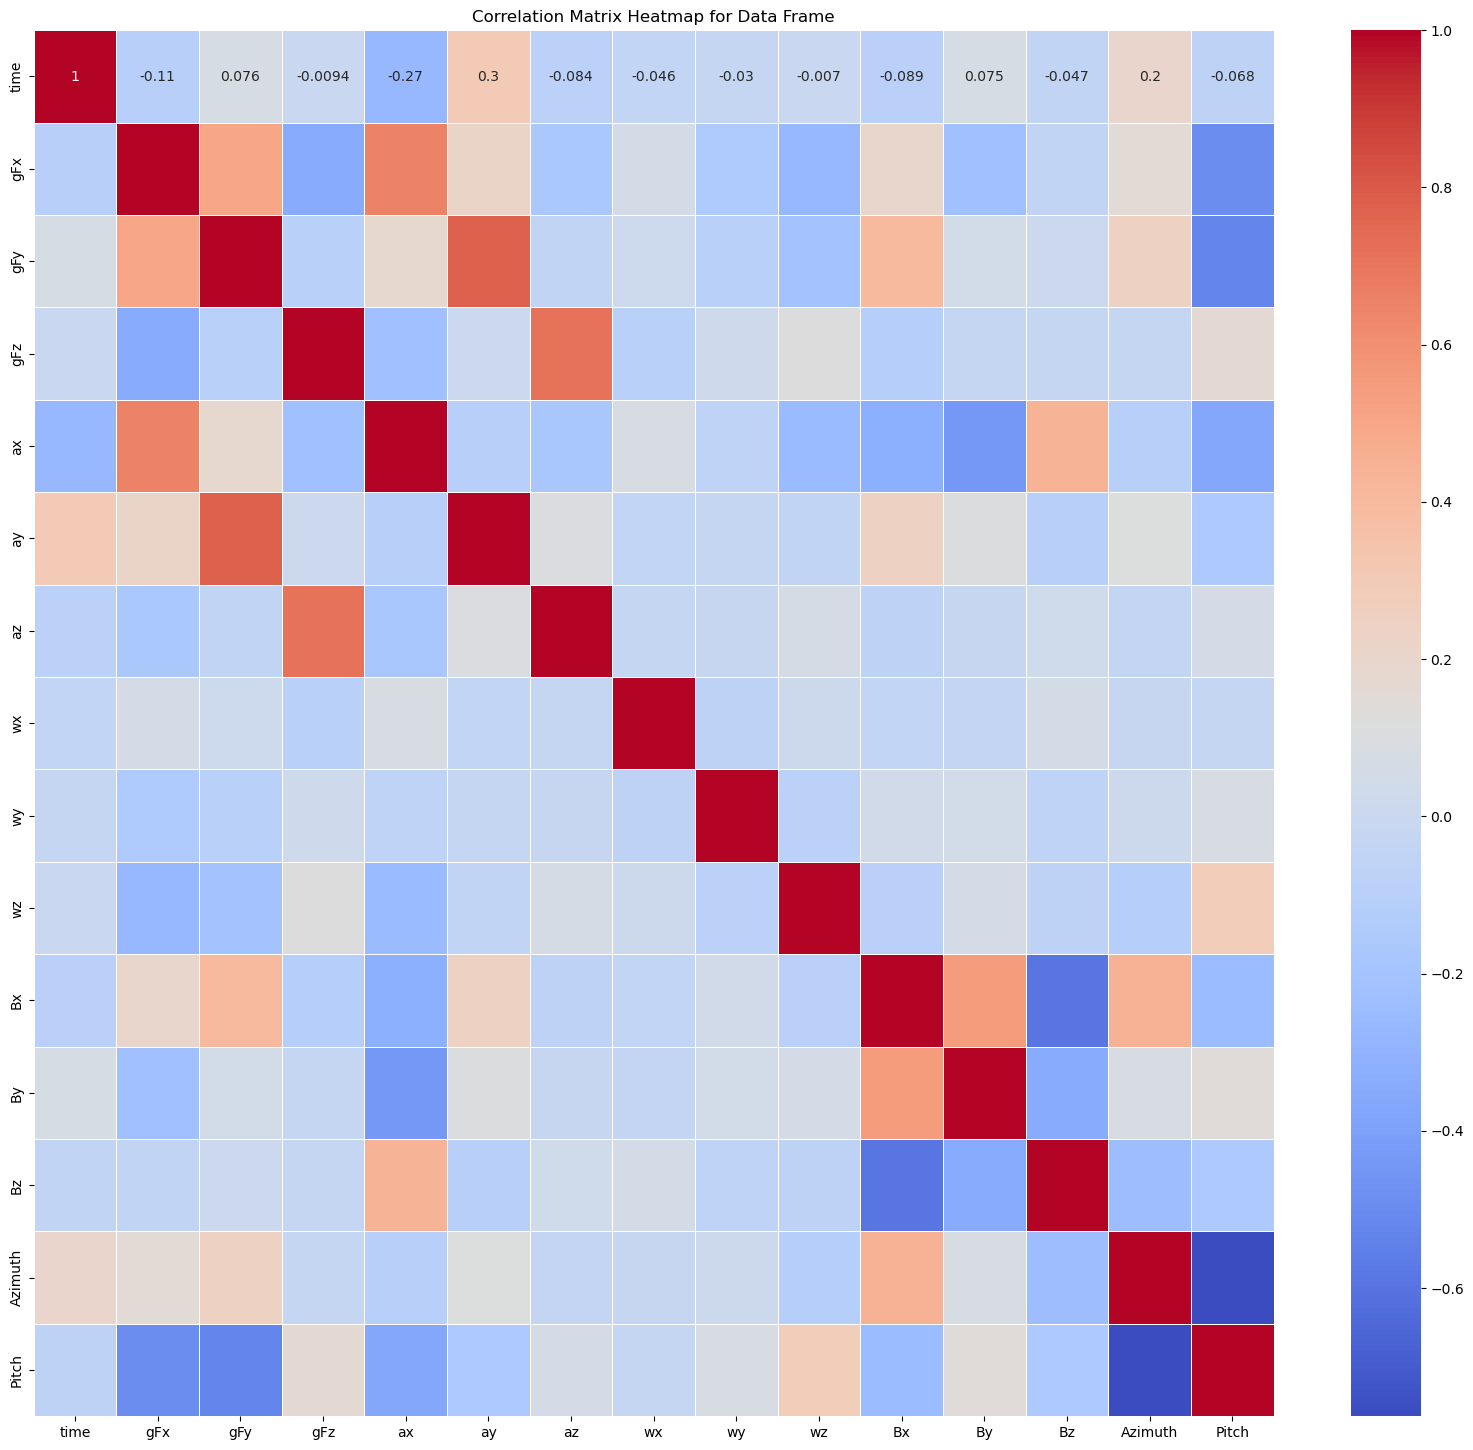

In [669]:
plt.figure(figsize=(20, 18))  # Adjust the figsize for better readability
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Data Frame')
plt.show()

# **FEATURE ENGINEERING**
Selection of columns from the original DataFrame df and storing it in new DataFrames with feature engineering before csv generation. We extract the features (X) by dropping... but then we also set our y(target variable) as 'Speed(m/s)' in terms of values. We normalize our feature data using StandardScaler to z-score scale the features which changes all of its mean and standard deviation values, resulting in X_scaled. And we have printed first the shape of X_scaled and next y to test if their dimensions are as expected. This action makes sure that the data is ready for model training, by not only taking out unwanted features but also splitting up target variable and normalizing feature data.

In [681]:
columns_to_use = ['gFx', 'gFy', 'gFz', 'ax', 'ay', 'az', 'wx', 'wy', 'wz', 'Bx', 'By', 'Bz', 'I', 'Azimuth', 'Pitch', 'Roll', 'Speed (m/s)']

df_selected = df[columns_to_use]

X = df_selected.drop(columns=['Speed (m/s)']).values  # Assuming 'Speed (m/s)' is not a target
y = df_selected['Speed (m/s)'].values  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape of X_scaled: {X_scaled.shape}")
print(f"Shape of y: {y.shape}")

Shape of X_scaled: (2855, 16)
Shape of y: (2855,)


# **MODEL TESTING AND HYPERPARAMETER TUNING**

Splitting the X_scaled and y into the Training and Test sets: First, splitting X_scaled and y to Training and Test sets utilizing train_test_split function, with test size equal to 20 percent and fixing random_state for reproducibility, and storing in learning variables X_train and y_train as well as X_test and y_test as outcomes. Printing the shapes to verify if the split was done correctly, with 80 percent of data in a training set, and 20 percent in a test set. It determines how well the model performs on unseen data.
I setup a Sequential neural network model with Keras API. The setting is a two-layer model: densely connected layers with 64 units and ReLU activation function in between, ending into single unit final layer suitable for regression task. In the first layer has input_shape parameter is shape of input data. We build the model with Adam optimizer and mean squared error as (mse) loss function because this is regression type problem.
I then define the model and train it using.fit() with our training data, X_train and y_train, while validating for test data (X_test, y_test) Model will be trained for 50 epochs, by slicing data into batches of size of 32 each and model weight finally gets updated based on the performance metrics. The validation_data will schedule the model to be tested on his test set at the end of each epoch which is a good way of tracking overfitting and generalization. The verbose=1 argument just prints detailed progress logs during training.

In [683]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes after splitting
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2284, 16)
Shape of X_test: (571, 16)
Shape of y_train: (2284,)
Shape of y_test: (571,)


In [684]:
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=1)  # Output layer for regression task
])

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [686]:
model.compile(optimizer='adam', loss='mse') 

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1738 - val_loss: 0.0154
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 - val_loss: 0.0082
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - val_loss: 0.0051
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_lo

# **MODEL EVALUATION**
TestData test_loss_and_Accuracy=Test.test_on_batch(test_img,test_images_label) It will estimate the generalization error (loss: MSE here) on a test set(X_test, y_test), which is an independent dataset from training. Prints the resulting test loss. This way we can see how wrong our predictions is. 

also plot the loss for training and validation over epochs to visualize how is it changing. Here, we initial a Matplotlib figure and create two lines (training loss: history. its bracket (history['loss']) and one for the validation loss (history. history['val_loss']). This plot helps us to understand the model performance over training, and also indicates whether our model is underfitting or over fitting. Training and validation loss fancy having decent downward trends that converge into nearly the same values is like a good model.

In [687]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9157e-04 
Test Loss: 0.000423830293584615


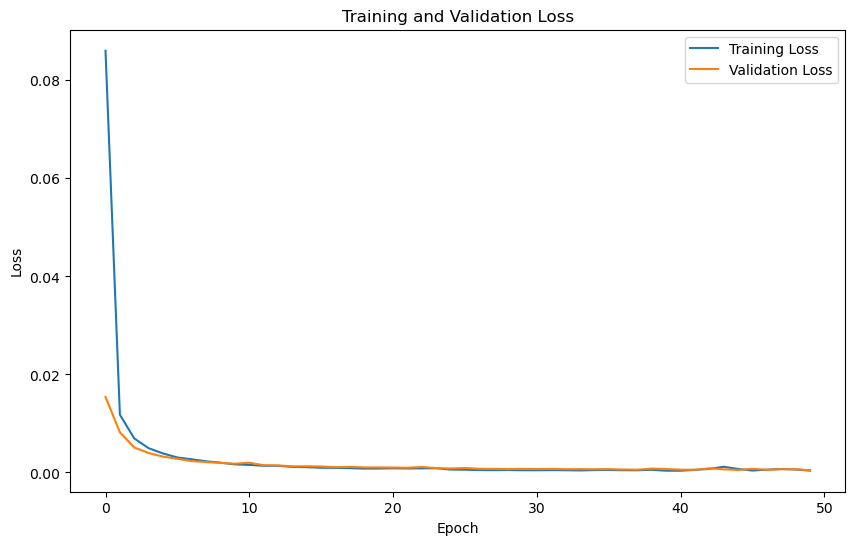

In [688]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **CONCLUSION**

The model training pipeline discussed here uses a Multi-Layer Perceptron (MLP) to guess bus locations using sensor data like accelerometer, gyroscope and magnetometer readings. The pipeline is standard: pre-process data, including feature selection and scaling; split into train/test sets create/compile the model define an MLP model fit on the training set evaluate performance The model performs well with the test loss of about 0.00042, indicating that predictions are close to true values The corresponding convergence of training and validation loss over 50 epochs is a sign that the model has indeed managed to learn from patterns in data without significant overfitting. Still the data might be corrupted by noise or outliers which lower its accuracy and using an MLP, while being effective enough for this problem - usage of RNN may provide better results as it can take advantage of temporal dependencies much more effectively than a simple feed-forward architecture. Nonetheless, based on the current results it seems that an MLP is a arguably reliable and true choice for this exact application.